# Zero-shot DSR using DynaMix


In [1]:
using DSR
using NPZ

## Load Model

In [ ]:
DynaMix, Observation_model = load_model("../models/dynamix-3d-alrnn-v1.0.bson"); # Add model path here

3D Dynamical Systems Reconstruction
=======

In [ ]:
# Forecasting Hyperparameters
# First forecast might take longer due to precompilation
CL = 2000; # Context length
T = 10000; # Prediction length

data = npzread("../notebooks/test_data/lorenz63.npy");

context = Float32.(data[1:CL,:]);
ground_truth = Float32.(data[CL+1:CL+T,:]);

reconstruction = Float32.(DynaMix_forecasting_pipeline(
                    DynaMix, Observation_model, context, T
));

Geometrical Disagreement: D_stsp=0.84990335
Temporal Disagreement: D_H=0.07706458
Prediction Error: PE=0.4084140877636717


sys:1: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


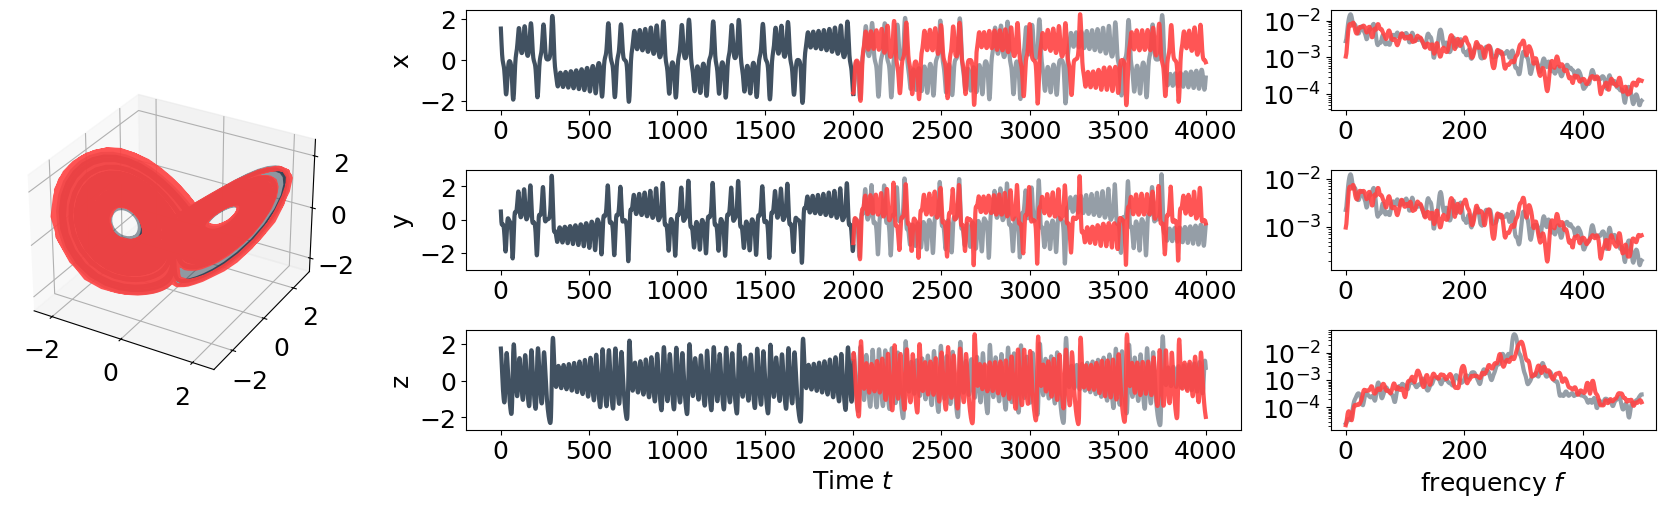

In [4]:
bins = 30
smoothing = 20.0f0
steps = 10

Dstsp = state_space_divergence(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)], bins)
DH = power_spectrum_error(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)], smoothing)
PE = MASE(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)],steps)

println("Geometrical Disagreement: ","D_stsp=", Dstsp)
println("Temporal Disagreement: ","D_H=", DH)
println("Prediction Error: ","PE=", PE)
plot_3D_attractor(ground_truth, context, reconstruction)

In [5]:
# Forecasting Hyperparameters
CL = 1028; # Context length
T = 10000; # Prediction length

data = npzread("../notebooks/test_data/chua.npy");

context = Float32.(data[1:CL,:]);
ground_truth = Float32.(data[CL+1:CL+T,:]);

reconstruction = Float32.(DynaMix_forecasting_pipeline(
                    DynaMix, Observation_model, context, T
));

Geometrical Disagreement: D_stsp=1.9843895
Temporal Disagreement: D_H=0.0953209
Prediction Error: PE=0.2302345564132693


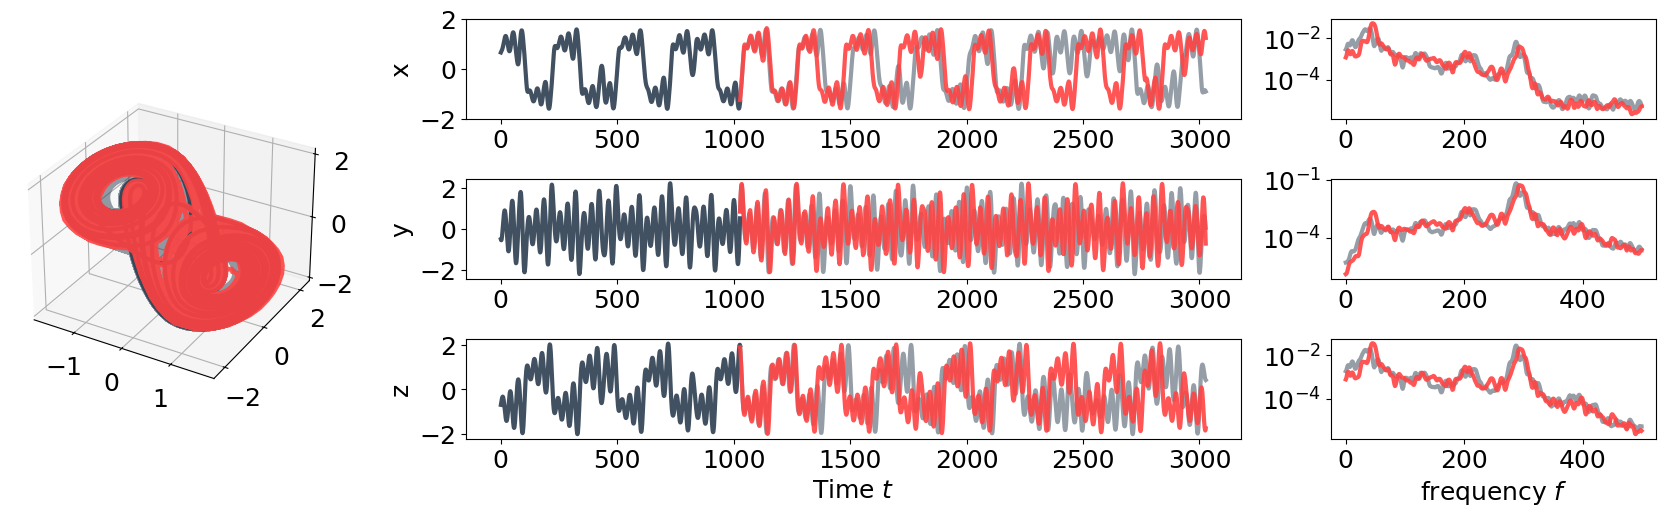

In [6]:
bins = 30
smoothing = 20.0f0
steps = 10

Dstsp = state_space_divergence(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)], bins)
DH = power_spectrum_error(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)], smoothing)
PE = MASE(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)],steps)

println("Geometrical Disagreement: ","D_stsp=", Dstsp)
println("Temporal Disagreement: ","D_H=", DH)
println("Prediction Error: ","PE=", PE)
plot_3D_attractor(ground_truth, context, reconstruction)

In [7]:
# Forecasting Hyperparameters
CL = 512; # Context length
T = 10000; # Prediction length

data = npzread("../notebooks/test_data/sprottM.npy");

context = Float32.(data[1:CL,:]);
ground_truth = Float32.(data[CL+1:CL+T,:]);

reconstruction = Float32.(DynaMix_forecasting_pipeline(
                    DynaMix, Observation_model, context, T
));

Geometrical Disagreement: D_stsp=3.2473307
Temporal Disagreement: D_H=0.09179375
Prediction Error: PE=0.19407029439590884


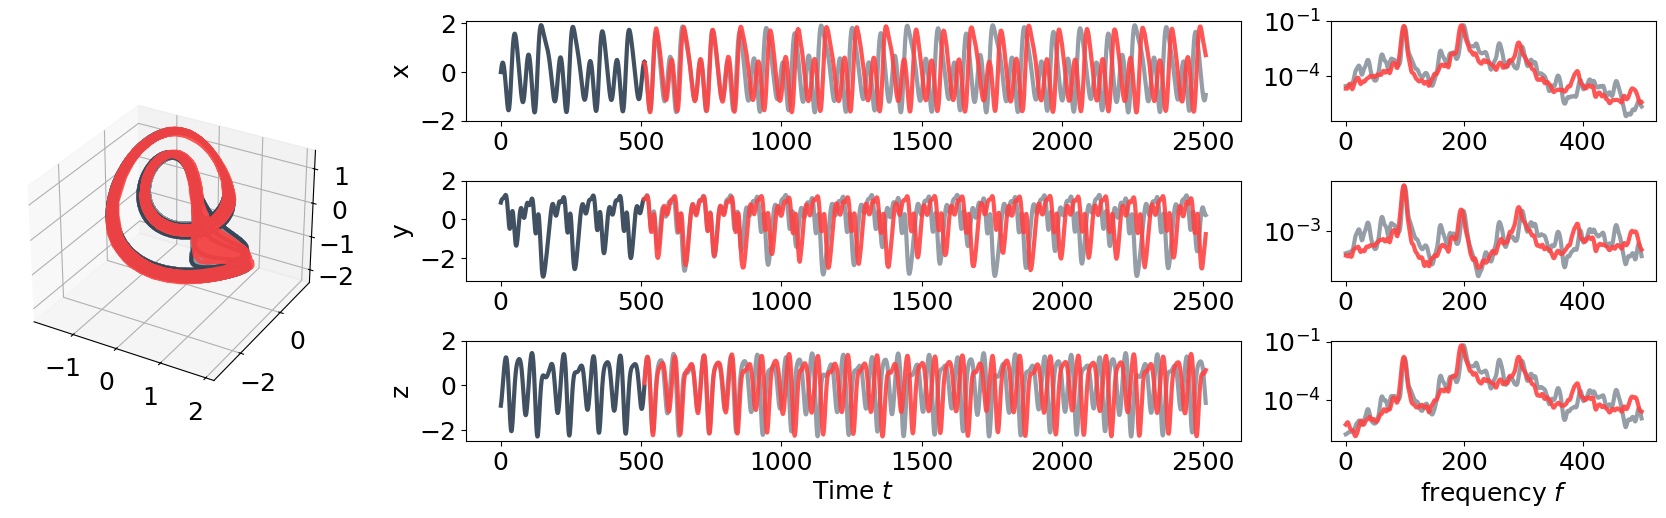

In [8]:
bins = 30
smoothing = 20.0f0
steps = 10

Dstsp = state_space_divergence(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)], bins)
DH = power_spectrum_error(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)], smoothing)
PE = MASE(ground_truth[1:T,:], reconstruction[1:T,1:size(context,2)],steps)

println("Geometrical Disagreement: ","D_stsp=", Dstsp)
println("Temporal Disagreement: ","D_H=", DH)
println("Prediction Error: ","PE=", PE)
plot_3D_attractor(ground_truth, context, reconstruction)

2D Dynamical Systems Reconstruction
=======

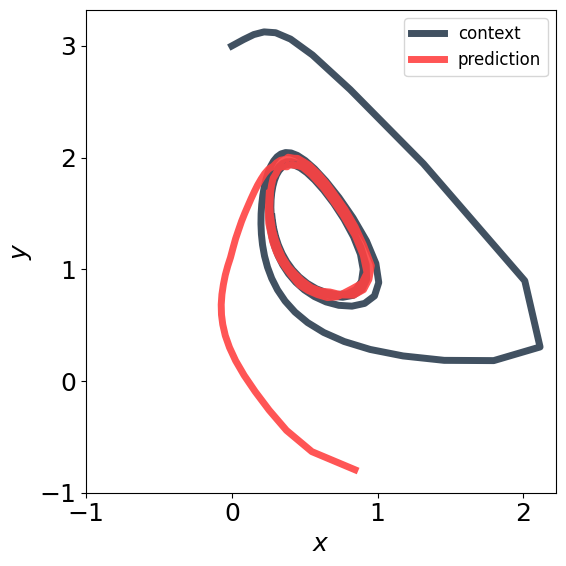

In [4]:
T = 100
initial = Float32.([1,-1])

context = Float32.(npzread("../notebooks/test_data/selkov.npy"));

reconstruction = Float32.(DynaMix_forecasting_pipeline(
                    DynaMix, Observation_model, context, T, 
                    initial_x=initial, preprocessing_method="zero_embedding",
                    standardize=false
));

plot_2D_attractor(context, reconstruction)